<a href="https://colab.research.google.com/github/GallardoCarmen/Mineria_Datos/blob/main/LAB01_Grupo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 02.</font>
##### Laura Lirón Carrión, Carmen Gallardo Martín, David Marín Sala y Nuria Prol Vecoña.

# <font color='00008B'>LABORATORIO 1.</font>

**PREPROCESAMIENTO Y VISUALIZACIÓN**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# **Práctica 1 (Vacunación COVID)**

*Valor (2,5 puntos)*

A finales de 2020 empezó la vacunación del COVID-19 que ha producido la mayor pandemia mundial que se
recuerda. Algunos países en vista de los problemas que puedan causar futuras pandemias quieren saber
qué país está llevando el plan de vacunación más eficiente. En España, el Centro de Biología Molecular
Severo Ochoa donde participa la Doctora Margarita del Val. Para ello vamos a obtener cual es la evolución
del número de vacunados en el tiempo usando el set de datos vacunaciones.csv.


### **RESOLUCIÓN.**

In [ ]:
# En primer lugar cargamos la BBDD para poder observar y entender como es.
df = pd.read_csv('vacunaciones.csv')

# Visualizamos las primeras filas para entender la estructura
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


**1.- (1,5 puntos) Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.**


In [ ]:
# Creamos la funcion para rellenar los MissingValues.
def rellena_missingvalues(df):

    # Creamos una copia de la BBDD.
    df_nueva = df.copy()

    # Iteramos por cada pais diferente en la BBDD.
    for country in df_nueva['country'].unique():

        country_df = df_nueva[df_nueva['country'] == country] # Dataframe de cada uno de los paises.
        indices = country_df.index

        # Iteramos por cada indice de los dataframe del pais.
        for i in range(len(indices)):

            if pd.isna(country_df.loc[indices[i], 'people_vaccinated']): # En caso de que el valor sea Nan.

            # CASO ESPECIAL: los tres primeros valores del pais son 0 o Nan.
                if i < 3 or pd.isna(country_df.loc[indices[:i], 'people_vaccinated']).all() or (country_df.loc[indices[:i], 'people_vaccinated'] == 0).all():

                    # Buscamos el primer valor no Nan despues del actual.
                    proximo_valor = country_df.loc[indices[i:], 'people_vaccinated'].dropna()
                    if not proximo_valor.empty:

                        primer_valor = proximo_valor.iloc[0]
                        primer_indice = proximo_valor.index[0]

                        # Calculamos la diferencia lineal hasta el primer valor.
                        num_faltante = primer_indice - indices[i]
                        paso = (primer_valor) / (num_faltante + 1)

                        for j in range(num_faltante):

                            df_nueva.loc[indices[i + j], 'people_vaccinated'] = paso * (j + 1)

                else:
                    # Seguimos los pasos del enunciado rellenando el Nan con la media de los tres anteriores.
                    valores_validos = country_df.loc[indices[i-3:i], 'people_vaccinated'].dropna()
                    if not valores_validos.empty:

                        media = valores_validos.mean()
                        df_nueva.loc[indices[i], 'people_vaccinated'] = media

                    else:

                        ultimo_valor_valido = country_df.loc[indices[:i], 'people_vaccinated'].dropna().iloc[-1]
                        df_nueva.loc[indices[i], 'people_vaccinated'] = ultimo_valor_valido

    return df_nueva

df_nueva = rellena_missingvalues(df)

df_nueva.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,64.0,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


### **EXPLICACIÓN**

El preprocesamiento de datos es una fase muy importante en el análisis para la toma de decisiones sobre unos datos. Para ello comenzamos con el ejercicio de rellenar valores faltantes o 'missing values' de la base de datos proporcionada.

####**Importancia de Rellenar los Missing Values**

Los valores faltantes representan una gran problema, ya que pueden llevar a  sesgos y errores en el análisis y en los modelos predictivos, lo que nos haría llegar a concluisones menos fiables y precisas.

Las técnicas para realizar dicha acción varían desde métodos simples, como la sustitución por la media o la mediana, hasta métodos más complejos como la imputación múltiple o la imputación basada en modelos, que pueden incluir algoritmos de aprendizaje automático. Los métodos escogidos han sido los siguientes.

####**Métodos Usados**

*Media de los Tres Valores Anteriores:*
- **¿Por qué?** Esta técnica se basa en la idea de que los datos recientes pueden ser buenos indicadores de los valores faltantes, asumiendo cierta continuidad o tendencia en los datos.

- **Limitaciones:** No siempre es la mejor opción, especialmente si los datos son muy variables o si los primeros valores para un país son faltantes o ceros.

*Interpolación Lineal para los Casos Especiales:*
- **¿Por qué el cambio?** Cuando los primeros valores son todos ceros o faltantes, usar la media de los tres valores anteriores no tiene sentido porque no tenemos datos "anteriores" válidos (consideramos no válidos los tres ultimos datos de un pais para rellenar el primero de uno nuevo). La interpolación lineal permite estimar un cambio gradual desde cero hasta el primer valor conocido, asumiendo un crecimiento constante.
- **Significatividad:** Esta técnica es útil porque evita suposiciones incorrectas sobre los datos iniciales y proporciona una forma razonable de estimar los valores faltantes bajo ciertas condiciones.




**2.- (1 punto) De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación**

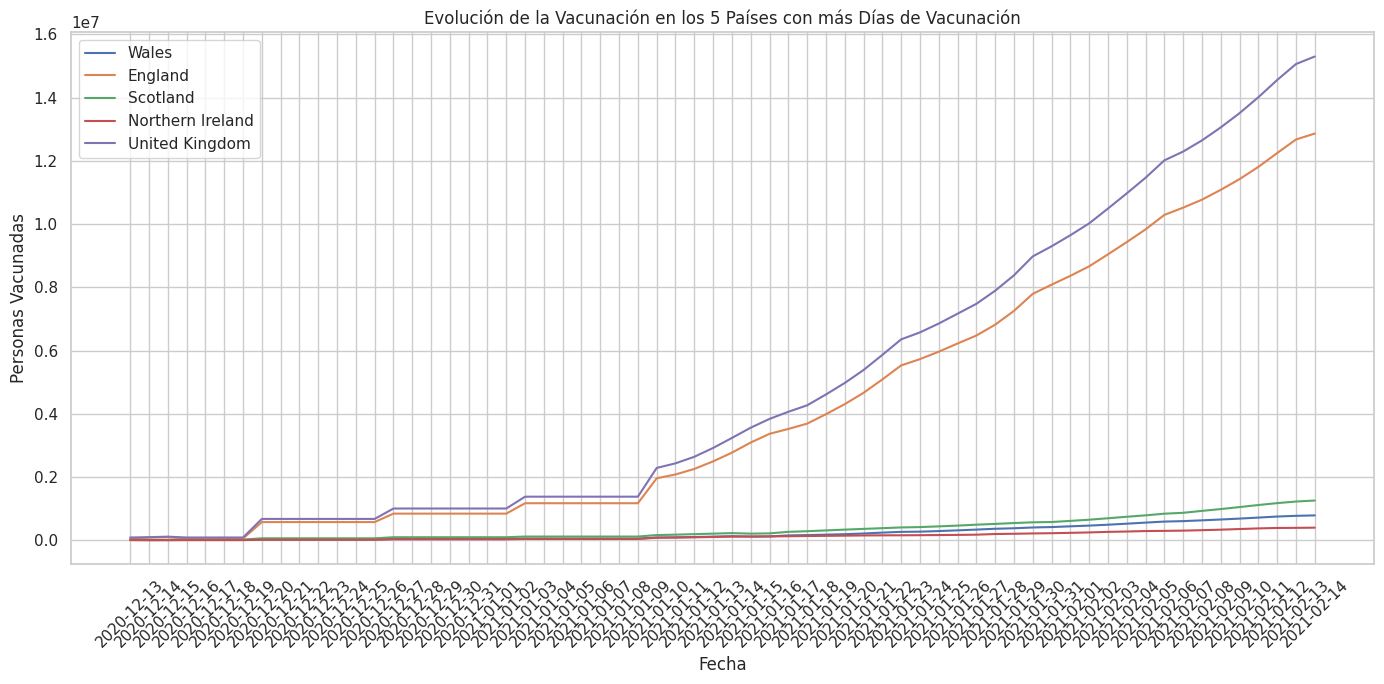

In [ ]:
# Identificamos los 5 paise con mas dias de vacunacion.
df_dias_vacunados = df_nueva.groupby('country').count()['date'].reset_index()
top_5_paises = df_dias_vacunados.sort_values(by='date', ascending=False).head(5)

# Obtenemos los nombres de dicho paises.
top_5_paises_nombre = top_5_paises['country'].tolist()

# Creamos el dataframe de solo eos 5 paises.
df_top_5_paises = df_nueva[df_nueva['country'].isin(top_5_paises_nombre)]

# Generamos el grafico.
# Configuración de visualización.
sns.set(style="whitegrid")

# Preparamos los datos para el gráfico.
df_grafico = df_top_5_paises.pivot(index='date', columns='country', values='people_vaccinated')

plt.figure(figsize=(14, 7))
for country in top_5_paises_nombre:

    plt.plot(df_grafico.index, df_grafico[country], label=country)

# Añadimos titulo, etiquetas y leyendas.
plt.title('Evolución de la Vacunación en los 5 Países con más Días de Vacunación')
plt.xlabel('Fecha')
plt.ylabel('Personas Vacunadas')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### **EXPLICACIÓN.**

Para resolver este ejercicio, en primer lugar se han determinado los 5 paises con más días de vacunación para poder representarlo. De esta forma podremos sacar conclusiones y responder a las preguntas formuladas.

#### **¿Qué diagrama se ha utilizado?**

Hemos empleado un gráfico de líneas para comparar la evolución en el tiempo del número de personas vacunadas en los cinco países seleccionados. Este tipo de gráfico es bueno para visualizar tendencias y patrones a lo largo de un período temporal.

#### **¿Por qué se ha utilizado este diagrama?**

Como ya hemos explicado, hemos escogido este gráfico debido a su eficacia para mostrar cómo cambian los datos a lo largo del tiempo. Nos permite identificar tendencias, picos y caídas en la cantidad de personas vacunadas, dándonos así una visión clara del progreso general.

#### **¿Cuál es el país que mejor está llevando a cabo la vacunación?**

Partiendo de que el mejor plan de vacunación es aquel que mantiene una tasa de vacunación más constante y creciente en el tiempo, podemos afirmar que el país que lleva un mejor programa es 'United Kingdom'.

Como se puede obvservar, tanto 'England' como 'United Kingdom' siguen una curva de crecimiento similar sin embargo este último siempre esta por encima de la anterior por lo que podemos decir que es mejor.

Es importante recalcar que estamos evaluando solo los paises que más días han vacunado y que solo estamos teniendo en cuenta la variable 'people_vaccinated'. Esto nos sirve para hacernos una idea pero para tomar decisiones sobre todos los datos que tenemos deberíamos hacer un estudio más profundo para poder determinar qué país lleva una mejor política de vacunación.

#### **Interpretación del plan de vacunación**

Al observar la gráfica de 'United Kingdom' podermos sacar algunas conclusiones de su plan de vacunación. En primer lugar, durante las primeras 4 semanas, se produjo una vacunación lenta y semanal, al comienzo de la semana se vacunaba y luego se estabilizaba el aumento de la vacunación. Esto podemos entenderlo como una menor procupación o compromiso con el sistema de vacunación del país. Porque durante las siguientes semanas, los números se disparan día tras día. Concuerda perfectamente con lo vivido en nuestro país, durante el comienzo de la vacunación los números eran bajos e irregulares hasta el punto de inflexión en el que la sociedad entendió la importancia y seguridad de las vacunas. Es en este punto en el que la gráfica se dispara.

# **Práctica 2 (Sensores atmosféricos)**

*Valor (3,5 puntos)*

Se cuenta con los datos del año 2020 de distintas mediciones de un sensor medioambiental situado en el
campus de la Universidad Francisco de Vitoria. Para analizar la información recogida haremos uso de un
dataset proporcionado por la propia Universidad llamado “ozone”.




### **RESOLUCIÓN.**

In [ ]:
bd = pd.read_csv("ozone.csv")

#Miramos si los datos están cargados correctamente
print(bd.head())

                                              Month,"Day_of_month","Day_of_week","ozone_reading","pressure_height","Wind_speed","Humidity","Temperature_Sandburg","Temperature_ElMonte","Inversion_base_height","Pressure_gradient","Inversion_temperature","Visibility"
1 5 1 5.34 5760 3 51 54 45.32 1450  25 57.02                                                 60                                                                                                                                                                         
  6 2 5.77 5720 4 69 35 49.64 1568  15 53.78                                                 60                                                                                                                                                                         
  7 3 3.69 5790 6 19 45 46.40 2631 -33 54.14                                                100                                                                                                              

Los datos se han cargado incorrectamente, así que procederemos a realizar los ajustes necesarios y a recargar la base de datos.

In [ ]:
with open('ozone.csv', 'r') as file:
    linea = file.readline().strip() #Primera linea del csv(donde están los nombres de las variables)

columnas = linea.split(",") #obtenemos cada nombre que está separado por comas

columnas2 = [name.replace('"', '') for name in columnas] #Quitamos las comillas de los nombres

#Lo volvemos a cargar pero ahora saltándonos la primera fila y añadiendo los nombres "limpios"
bd = pd.read_csv('ozone.csv', header=None, skiprows=1, names=columnas2)


print(bd.head())

   Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      1             5            1           5.34             5760   
1      1             6            2           5.77             5720   
2      1             7            3           3.69             5790   
3      1             8            4           3.89             5790   
4      1             9            5           5.76             5700   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0           3        51                    54                45.32   
1           4        69                    35                49.64   
2           6        19                    45                46.40   
3           3        25                    55                52.70   
4           3        73                    41                48.02   

   Inversion_base_height  Pressure_gradient  Inversion_temperature  Visibility  
0                   1450                 25                  57.02     

Una vez cargada correctamente vemos el tipo de base de datos que tenemos, la base de datos contiene 13 variables y 204 registros. Cada fila corresponde a un día donde se estudió la lectura promedio de ozono máximo diario en una hora, la presión, velocidad del viento en mph, porcentaje de humedad, temperatura en ºF en Sanburg y El Monte (Ciudades de California), altura de la base de inversión (pies), Gradiente de presión (mm Hg), temperatura de la base de inversión y visibilidad en millas.

**1.- (0,75 puntos) Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso.**

Para estudiar los outliers utilizaremos un gráfico de bigotes. En este tipo de gráfico se puede observar la variabilidad de los datos de una variable.




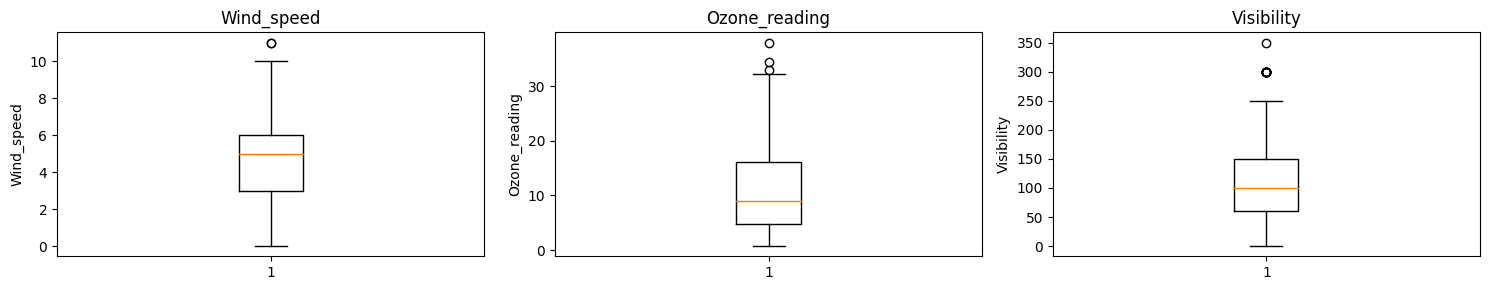

Variable        IQR             Outliers
------------------------------------------------
Wind speed      3.0             11, 11         
Ozone reading   11.305          33.04, 34.39, 37.98
Visibility      90.0            350, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300


In [ ]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.boxplot(bd["Wind_speed"].dropna())
plt.title('Wind_speed')
plt.ylabel('Wind_speed')

plt.subplot(1, 3, 2)
plt.boxplot(bd['ozone_reading'].dropna())
plt.title('Ozone_reading')
plt.ylabel('Ozone_reading')

plt.subplot(1, 3, 3)
plt.boxplot(bd['Visibility'].dropna())
plt.title('Visibility')
plt.ylabel('Visibility')

plt.tight_layout()
plt.show()

#Calculamos el primer y tercer cuartil de ambas variables
Q1w = bd['Wind_speed'].quantile(0.25)
Q3w = bd['Wind_speed'].quantile(0.75)

#Rango intercuartílico
RangoIntw = Q3w - Q1w

Q1o = bd['ozone_reading'].quantile(0.25)
Q3o = bd['ozone_reading'].quantile(0.75)

#Rango intercuartílico
RangoInto = Q3o - Q1o

Q1v = bd['Visibility'].quantile(0.25)
Q3v = bd['Visibility'].quantile(0.75)

#Rango intercuartílico
RangoIntv = Q3v - Q1v

#Datos menores o mayores al rango*1.5
outliers_wind = bd[(bd['Wind_speed'] < (Q1w - 1.5 * RangoIntw)) | (bd['Wind_speed'] > (Q3w + 1.5 * RangoIntw))]

outliers_ozone = bd[(bd['ozone_reading'] < (Q1o - 1.5 * RangoInto)) | (bd['ozone_reading'] > (Q3o + 1.5 * RangoInto))]

outliers_visibility = bd[(bd['Visibility'] < (Q1v - 1.5 * RangoIntv)) | (bd['Visibility'] > (Q3v + 1.5 * RangoIntv))]


def list_to_string(lst):
    return ', '.join(str(e) for e in lst)


print(f"{'Variable       '} {'IQR            '} {'Outliers'}")
print(f"{'------------------------------------------------'}")
print(f"{'Wind speed     '} {RangoIntw:<15} {list_to_string(outliers_wind['Wind_speed']):<15}")
print(f"{'Ozone reading  '} {RangoInto:<15} {list_to_string(outliers_ozone['ozone_reading']):<15}")
print(f"{'Visibility     '} {RangoIntv:<15} {list_to_string(outliers_visibility['Visibility']):<15}")


### **EXPLICACIÓN.**

####**Wind speed**

En el primer gráfico se estudian los datos de Wind speed. La caja central representa el IQR o rango intercuartílico. Este rango es una medida de dispersión estadística. Conforme aumente el IQR, indicará que la dispersión será mayor, así que mientras más grande sea la caja mayor variabilidad habrá. Al ver la caja vemos que la mitad central de los datos de velocidad del viento se encuentra entre aproximadamente 3 y 6.
Al IQR de Wind speed ser 3 eso nos dice que el 50% de los datos estudiados están comprendidos en 3uds.

Como la parte inferior de la caja es mayor que la superior quiere decir que los datos de viento comprendidos entre el 25% y el 50% de la población están menos dispersos que los datos entre el 50% y el 75%.

La linea central muestra la mediana, que está en el 5, lo que nos dice que 5 es el valor central de los datos.

Los bigotes se extienden desde el borde inferior de la caja hasta aproximadamente 0 y desde el borde superior hasta cerca de 10, indicando el rango de la mayoría de los datos de velocidad del viento.

Hay puntos por encima del bigote superior, que representan valores extremos o outliers en los datos de velocidad del viento, sugiriendo que hay algunas observaciones de velocidad del viento que son inusualmente altas. Estos datos son solamente 2 que se encuentran en el valor 11.


####**Ozone reading**

En el gráfico de ozone reading podemos ver que el IQR se extiende desde el 5 al 15 aproximadamente, lo que nos indica que el 50% de los datos se extienden en ese rango. Al medirlo vemos que el IQR es 11.305.

Los bigotes se extienden desde cerca de 0 hasta aproximadamente 30, mostrando que los datos centrales de lectura de ozono se encuentran entre ese rango.

En este caso el bigote inferior es más corto que el superior lo que nos dice que el 25% de las lecturas de ozono menores están más concentradas que el 25% de las mayores.

Hay 3 puntos por encima del bigote superior, marcado como un outlier. Estos valores extremos son considerablemente más altos que el resto de los datos de lectura de ozono. Estos 3 datos son 33.04, 34.39, 37.98.

####**Visbility**

Por último en la gráfica de visibility se puede ver como el rango intercuartílico abarca del 50 al 150, lo comprobamos al calcularlo y vemos que el IQR es de 90 unidades, el 50% de la población está comprendida en ese rango. Y los outliers se encuentran varios en el 300, es por eso que el círculo es más grueso pero también hay un valor que asciende hasta el 350.



**2.- (0,75 puntos) Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”.**

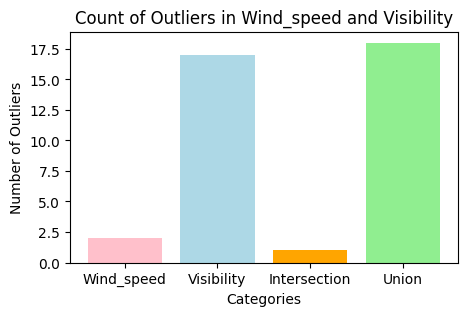

[2, 17, 1, 18]


INTERSECCIÓN DE OUTLIERS


   Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      2             9            1           2.92             5490   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0          11        72                    37                38.48   

   Inversion_base_height  Pressure_gradient  Inversion_temperature  Visibility  
0                   5000                 32                  38.12         350  


UNIÓN DE OUTLIERS


    Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0       2             9            1           2.92             5490   
1       3             3            3           2.79             5320   
2       2            10            2           4.08             5560   
3       2            12            4           8.32             5680   
4       2            20            5           5.73             5690   
5       2            23            1           4.04     

In [ ]:
# Encontrar la intersección y la unión de los outliers
outliers_intersection = pd.merge(outliers_wind, outliers_visibility, how='inner')
outliers_union = pd.concat([outliers_wind, outliers_visibility]).drop_duplicates().reset_index(drop=True)

# Mostrar el número de outliers en cada caso
outliers_counts = [ len(outliers_wind),
                   len(outliers_visibility),
                    len(outliers_intersection),
                    len(outliers_union)]

# Gráfico de barras para el número de outliers
labels = ['Wind_speed', 'Visibility', 'Intersection', 'Union']

plt.figure(figsize=(5, 3))
plt.bar(labels, outliers_counts, color=['pink', 'lightblue', 'orange', 'lightgreen'])
plt.title('Count of Outliers in Wind_speed and Visibility')
plt.xlabel('Categories')
plt.ylabel('Number of Outliers')
plt.show()
print(outliers_counts)

print("\n\nINTERSECCIÓN DE OUTLIERS\n\n")
print(outliers_intersection)
print("\n\nUNIÓN DE OUTLIERS\n\n")
print(outliers_union)




### **EXPLICACIÓN.**

El estudio de la unión e intersección de outliers puede ser útil para ver si los datos fueron recogidos de manera correcta o si hubo algun error. Támbien para analizar si estos outliers deben ser eliminados.

De un total de 203 registros en la base de datos, la unión de outliers relacionados con la velocidad del viento y la visibilidad suma 18, indicando que el 8.9% de los datos presenta anomalías en al menos una de estas dos variables.


Sin embargo, al observar la intersección de valores atípicos entre estas dos variables, solo encontramos 1 registro que comparte estas características, sugiriendo que la eliminación de valores atípicos deberá ser de los 18 registros.

Este registro específico corresponde al lunes 9 de febrero, cuando la velocidad del viento alcanzó las 11 unidades y la visibilidad estuvo en su máximo, 350. Este enfoque selectivo para la eliminación de outliers asegura que solo se descarten los datos estrictamente necesarios, manteniendo la integridad del conjunto de datos.

Además los 16 valores atípicos restantes en la variable 'Visibility' son consistentemente de 300. Esta repetición sugiere que estos datos podrían ser considerados importantes para el análisis, dada su frecuencia de ocurrencia.


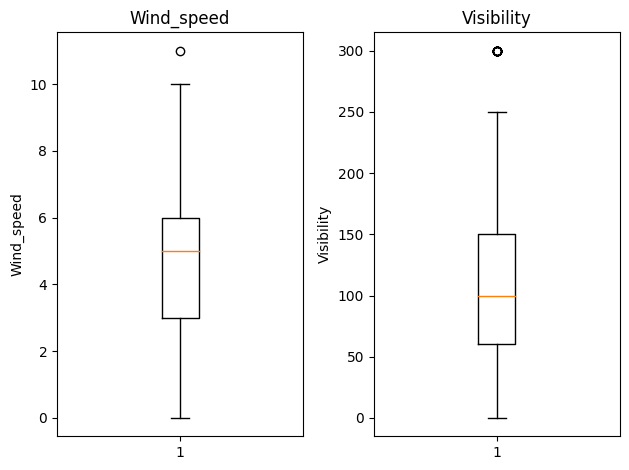

In [ ]:
bd = bd[
    ~((bd['Month'] == 2) &
      (bd['Day_of_month'] == 9) )
] #Eliminamos la fila que contiene información sobre el día 9 de febrero

plt.subplot(1, 2, 1)
plt.boxplot(bd["Wind_speed"].dropna())
plt.title('Wind_speed')
plt.ylabel('Wind_speed')

plt.subplot(1, 2, 2)
plt.boxplot(bd['Visibility'].dropna())
plt.title('Visibility')
plt.ylabel('Visibility')

plt.tight_layout()
plt.show()

Se puede ver como ahora en el gráfico de Visibility ya no se muestra el outlier en 350.


**3.- (1 punto) Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?**

Categorizamos la variable `Wind_speed` creando una nueva columna en la base de datos `Wind_speed_categorizada`. Para esto necesitamos utilizar la función `pd.cut`, que divide y simplifica la variable en tres niveles 'Baja','Media' y 'Alta' según la frecuencia. Categorizando los valores de velocidad del viento menores o iguales a 3 como 'Baja', los valores entre 3 y 12 como 'Media', y los valores mayores a 12 como 'Alta'. Hemos tomado estas mediciones ya que en meteorología se suelen usar estos rangos.

In [ ]:
bd['Wind_speed_categorizada'] = pd.cut(bd['Wind_speed'], bins=[0, 3, 12, np.inf], labels=['Baja', 'Media', 'Alta'])

Representamos con un gráfico de barras la **frecuencia de categorías de velocidad del Viento**.

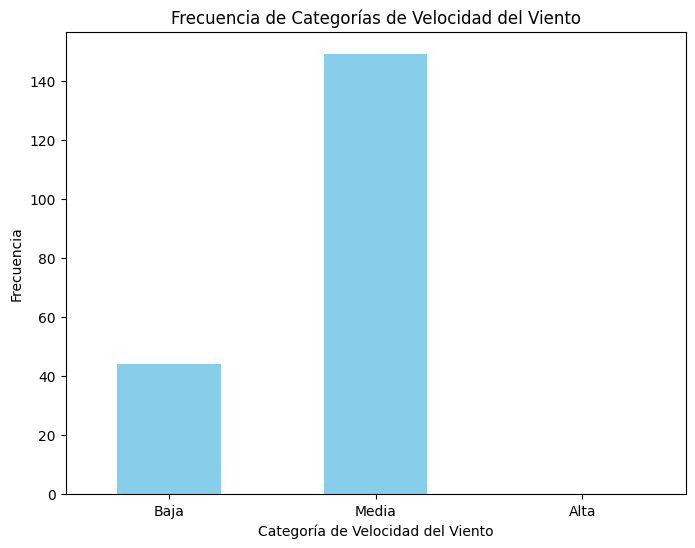

In [ ]:
order_categories = ['Baja', 'Media', 'Alta']
plt.figure(figsize=(8, 6))
bd['Wind_speed_categorizada'].value_counts()[order_categories].plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Categorías de Velocidad del Viento')
plt.xlabel('Categoría de Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

A través del análisis del gráfico, se observa que la velocidad del viento nunca excede los 12 m/s, y que menos de la mitad de las observaciones registradas se encuentran en la categoría de velocidad del viento baja. En consecuencia, se deduce que la mayoría de las veces la velocidad del viento se sitúa en el rango intermedio, lo que indica que, en general, la velocidad del viento es de magnitud media.

----

Representación de la **relación entre la velocidad del viento y la visisbilidad**.

El siguiente código genera un gráfico de dispersión que visualiza la relación entre la velocidad del viento y la visibilidad en los datos proporcionados. Cada punto en el gráfico representa una observación individual, donde la posición en el eje x indica la velocidad del viento y la posición en el eje y indica la visibilidad.

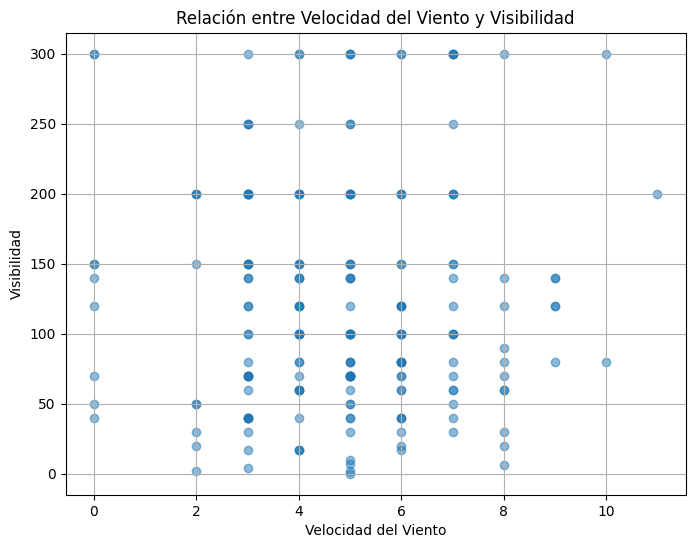

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(bd['Wind_speed'], bd['Visibility'], alpha=0.5)
plt.title('Relación entre Velocidad del Viento y Visibilidad')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Visibilidad')
plt.grid(True)
plt.show()

Creamos otro gráfico para tratar de entenderlo mejor. Este gráfico mostrará cómo cambia la visibilidad para diferentes rangos de velocidad del viento que hemos seleccionados en `wind_speed_bins`.
Para ello utilizamos un gráfico de líneas y observamos como la visibilidad mejora a medida que la velocidad del viento aumenta.

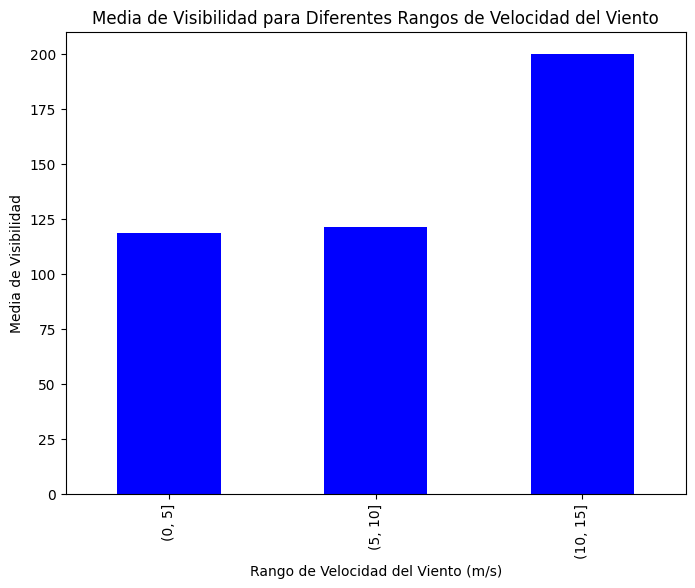

In [ ]:
wind_speed_bins = pd.cut(bd['Wind_speed'], bins=[0, 5, 10, 15])
visibility_means = bd.groupby(wind_speed_bins)['Visibility'].mean()

plt.figure(figsize=(8, 6))
visibility_means.plot(kind='bar', color='blue')
plt.title('Media de Visibilidad para Diferentes Rangos de Velocidad del Viento')
plt.xlabel('Rango de Velocidad del Viento (m/s)')
plt.ylabel('Media de Visibilidad')
plt.show()

 A continuación categorizamos las variables Meses, Día del mes y día de la semana.

 Vamos a crear un gráfico de bigotes para ver como se ha distribuido la velocidad del viento por mes. Esto nos muestra la media de la velocidad del viento en cada mes y las velocidades que han sido atípicas como por ejemplo en marzo, abril y septiembre.

<ipython-input-12-b1ea738ded6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Wind_speed', data=bd, palette='pastel')


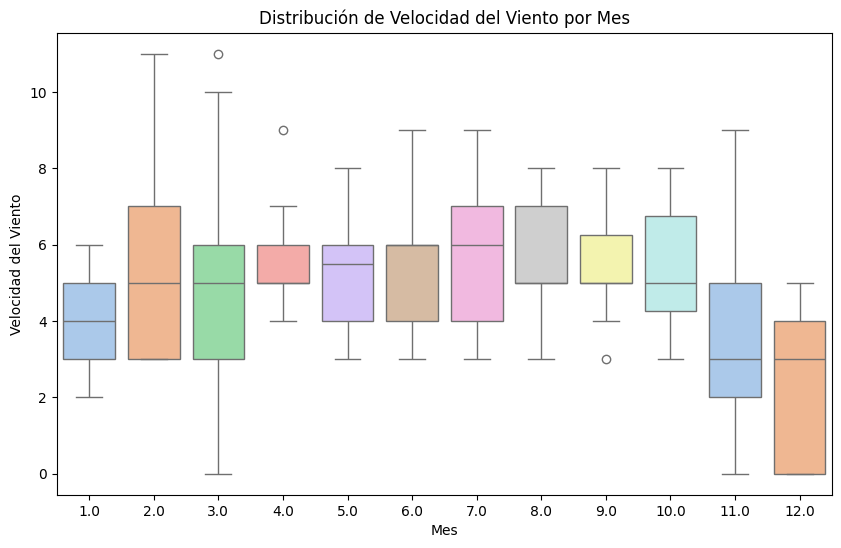

In [ ]:
categorical_columns = ['Month', 'Day_of_month', 'Day_of_week']
for col in categorical_columns:
    bd[col] = bd[col].astype('category')


# Crear un gráfico de caja para mostrar la distribución de 'Wind_speed' por mes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Wind_speed', data=bd, palette='pastel')
plt.title('Distribución de Velocidad del Viento por Mes')
plt.xlabel('Mes')
plt.ylabel('Velocidad del Viento')
plt.show()

Calculamos la media de las lecturas de ozono para cada mes del año y la mostramos en un gráfico de barras. Podemos observar como en mayo, junio, julio y agosto, son particularmente altos. Esto podría deberse a que son los meses más cálidos del año y las temperaturas altas aumentan la velocidad de las reacciones químicas que producen ozono.

<ipython-input-13-b47cb97a47d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='ozone_reading', data=promedioozono, palette='viridis')


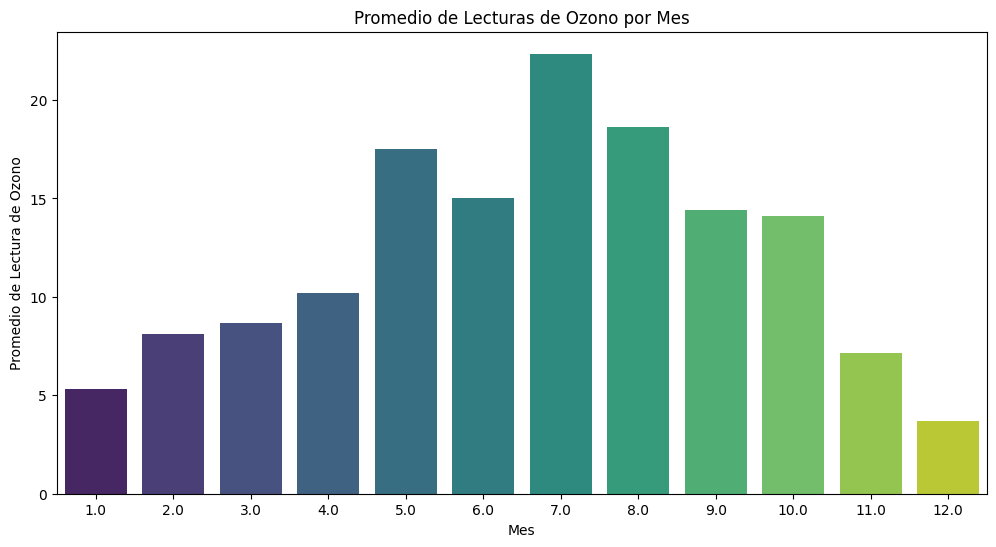

In [ ]:
promedioozono = bd.groupby('Month')['ozone_reading'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='ozone_reading', data=promedioozono, palette='viridis')
plt.title('Promedio de Lecturas de Ozono por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Lectura de Ozono')
plt.show()

**4.- (1 punto) Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta**

Vamos a representar las frecuencias de la velocidad del viento, la visibilidad, la humedad y la lectura de ozono respecto a los días de medición. En nuestro caso, la vamos a represenntar en un **diagrama de líneas** ya que estos son excelentes para visualizar cómo las variables cambian con el tiempo, permitiendo identificar tendencias ascendentes o descendientes y cualquier punto de inflexión significativo.

Descartamos los **diagramas de dispersión** para este apartado ya que no nos interesa saber la relación que hay entre las variables. Por otro lado, damos de lado crear un **mapa de calor** ya que después de haberlo probado, encontramos dificultades para poder interpretarlo. **Boxplot** nos daba mucha información de las variables pero no nos muestra cómo los datos cambian con el tiempo al igual que los gráficos de violín, por ello no dudamos a la hora de descartarlos.

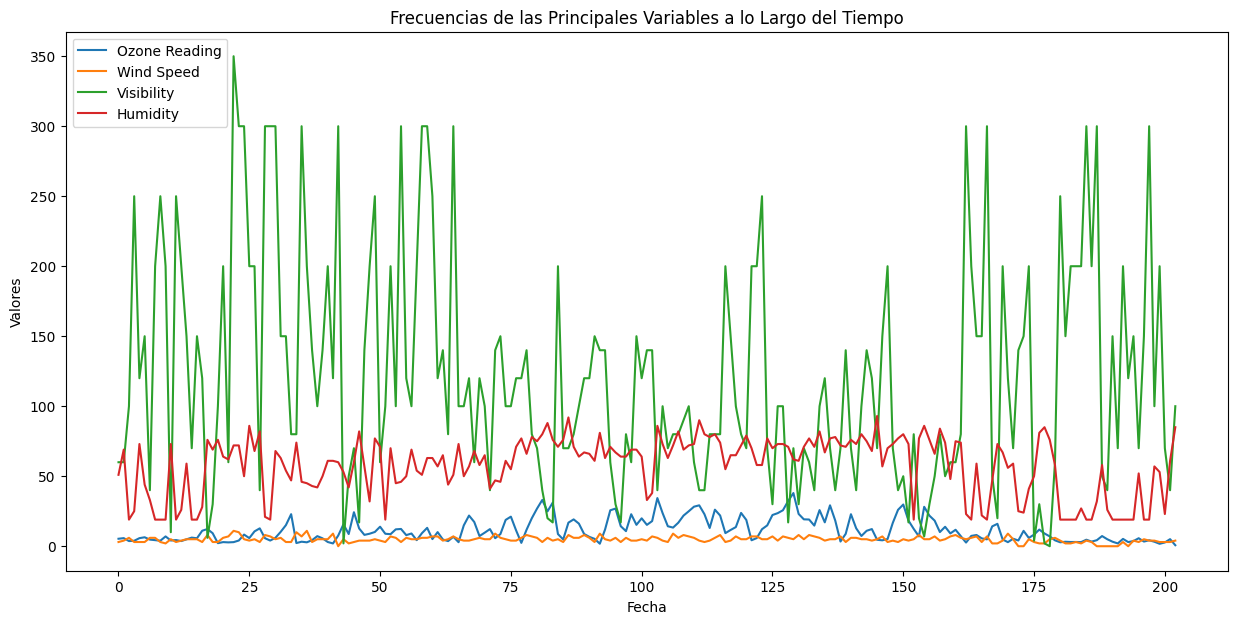

In [ ]:
fig, x = plt.subplots(figsize=(15, 7))

x.plot(bd.index, bd['ozone_reading'], label='Lectura de Ozono')
x.plot(bd.index, bd['Wind_speed'], label='Velocidad del Viento')
x.plot(bd.index, bd['Visibility'], label='Visibilidad')
x.plot(bd.index, bd['Humidity'], label='Humedad')

x.set_xlabel('Fecha')
x.set_ylabel('Valores')
x.set_title('Frecuencias de las Principales Variables a lo Largo del Tiempo')
x.legend()

plt.show()


# **Práctica 3 (Reducción de la dimensionalidad)**

*Valor (4 puntos)*

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias
dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional,
podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha
metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de
datos que está colgado en Canvas llamado USA.xlsx y vamos a dar una serie de explicaciones de que ocurre.



### **RESOLUCIÓN.**

In [3]:
#Cargamos los datos desde el archivo 'USA.xlsx'
datosUSA = pd.read_excel('USA.xlsx')

#Miramos si los datos están cargados correctamente
print(datosUSA.head())

          Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
0        Phoenix  10.0      70.3     213.0      582.0     6.0    7.05   36.0
1    Little Rock  13.0      61.0      91.0      132.0     8.2   48.52  100.0
2  San Francisco  12.0      56.7     453.0      716.0     8.7   20.66   67.0
3         Denver  17.0      51.9     454.0      515.0     9.0   12.95   86.0
4       Hartford  56.0      49.1     412.0      158.0     9.0   43.37  127.0


En este ejercicio, estaremos trabajando con un conjunto de datos que describe diversas características ambientales y socioeconómicas de varias ciudades en los Estados Unidos. El objetivo principal es comprender mejor cómo estas variables están interrelacionadas y si podemos reducir su dimensionalidad de manera significativa para facilitar su interpretación.

Antes de proceder con el análisis, cargamos los datos desde un archivo 'USA.xlsx' y echamos un vistazo a las primeras filas para asegurarnos de que se cargaron correctamente. Esto nos proporciona una idea inicial de cómo se estructuran los datos y qué tipo de información contienen. Los datos incluyen mediciones de dióxido de azufre (SO2), temperatura media anual, número de empresas con más de 20 trabajadores, población, velocidad media del viento, precipitación anual media y la cantidad de días lluviosos al año. De primeras, ya podemos ver como estos parámetros pueden ofrecernos una visión general de la calidad del aire, el clima, la densidad poblacional y la actividad económica en cada ciudad.

**1.- (1 punto) Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango
no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de
la librería scikit-learn.**

In [4]:
#seleccionamos las columnas relevantes para el análisis de PCA
columnas = datosUSA.columns[1:8]

#creamos un DataFrame con las columnas seleccionadas
datosUSA_df = datosUSA[columnas]

#instanciar el StandardScaler
scaler = StandardScaler()

#Ajustamos y transformamos los datos utilizando el StandardScaler
datosUSA_df_escalados = scaler.fit_transform(datosUSA_df)

#creamos un nuevo DataFrame con los datos estandarizados
datosUSA_escalados = pd.DataFrame(datosUSA_df_escalados)

#visualización del DataFrame estandarizado
print(datosUSA_escalados)

           0         1         2         3         4         5         6
0  -0.864758  2.036213 -0.449363 -0.046520 -2.440555 -2.556012 -2.975514
1  -0.735360  0.733515 -0.668567 -0.833224 -0.881504  1.010653 -0.531009
2  -0.778493  0.131192 -0.018143  0.187743 -0.527174 -1.385471 -1.791457
3  -0.562829 -0.541168 -0.016346 -0.163651 -0.314576 -2.048577 -1.065744
4   1.119347 -0.933378 -0.091810 -0.787770 -0.314576  0.567723  0.500266
5   0.256692 -0.247010 -0.688331 -0.924132 -0.314576  0.299384  0.003726
6  -0.045237  0.215237 -0.052281  0.259420 -0.101978  0.182416 -0.110860
7  -0.692227  1.770071 -0.587713 -0.139176 -0.456308  1.522388  0.080117
8  -0.864758  2.764604 -0.460144 -0.478333 -0.314576  1.980800  0.538462
9  -0.260900  0.803553 -0.170867 -0.195120 -0.243710  0.995172  0.041922
10  3.448513 -0.723266  5.176267  4.825797  0.677548 -0.200310  0.309289
11 -0.088369 -0.485138 -0.183444  0.240190  0.181486  0.169516  0.271094
12 -0.562829 -0.947386 -0.645209 -0.712596  1.24447

Utilizamos el método StandardScaler de la biblioteca scikit-learn para normalizar los datos, lo que implica ajustar las variables para que tengan una media de 0 y una desviación estándar de 1. Esto garantiza que todas las variables estén en la misma escala.

En primer lugar, identificamos las columnas pertinentes del DataFrame original para el análisis de PCA. Luego, creamos una instancia de StandardScaler y aplicamos el método fit_transform para ajustar y transformar los datos. Posteriormente, creamos un nuevo DataFrame con los datos normalizados y lo mostramos para revisar los resultados.

El DataFrame normalizado muestra cada fila como una observación (en este caso, una ciudad) y cada columna como una variable.  Podemos observar que todas las variables ahora tienen una media cercana a 0 y una desviación estándar de aproximadamente 1, lo que indica que han sido correctamente estandarizadas y están listas para su análisis posterior.

**2.- (1 punto) El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y
los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para
representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza
mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de
NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica
qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información
representamos con 3 componentes?**



In [5]:
#Obtenemos la matriz de covarianza
matriz_cov = np.cov(datosUSA_df_escalados.T)

#Calculamos los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(matriz_cov)

#porcentaje de varianza por cada componente
varianza = eigenvalues / np.sum(eigenvalues)

# DataFrame con el porcentaje de varianza
varianza_df = pd.DataFrame({'Componente': range(1, len(eigenvalues) + 1),
                            '% de Varianza': varianza*100})

# Ordenar el DataFrame por el porcentaje de varianza de forma descendente
varianza_df = varianza_df.sort_values(by='% de Varianza', ascending=False)

# Reiniciar el índice del DataFrame
varianza_df.reset_index(drop=True, inplace=True)

# Agregar el número de componente reordenado
varianza_df['Componente'] = varianza_df.index + 1

# Calcular el porcentaje acumulado de varianza explicada
varianza_acumulada = varianza_df['% de Varianza'].cumsum()

# Agregar la columna de porcentaje acumulado al DataFrame
varianza_df['% de varianza acumulado'] = varianza_acumulada

# Resultados
print(varianza_df)

print("\nInformación perdida con 2 componentes:", 100 - varianza_acumulada[1])

print("Información representada con 3 componentes:", varianza_acumulada[2])

   Componente  % de Varianza  % de varianza acumulado
0           1      38.973138                38.973138
1           2      21.604784                60.577922
2           3      19.928186                80.506108
3           4      12.742733                93.248840
4           5       4.953981                98.202821
5           6       1.432680                99.635501
6           7       0.364499               100.000000

Información perdida con 2 componentes: 39.42207802198862
Información representada con 3 componentes: 80.50610753626255



Hemos calculado los autovalores (eigenvalues) y los autovectores (eigenvectors) de la matriz de covarianza de los datos estandarizados. Estos autovalores y autovectores nos permiten comprender cuántos componentes necesitamos para representar eficazmente la variabilidad de los datos originales.

El porcentaje de varianza por cada componente indica cuánta varianza de los datos originales es explicada por cada componente principal. En este caso, vemos que el primer componente explica aproximadamente el 38.97% de la varianza total, el segundo componente explica alrededor del 21.60%, y así sucesivamente.

El porcentaje acumulado de varianza explicada nos dice cuánta varianza total se explica al considerar cada componente en orden descendente. En este caso, podemos observar que con los dos primeros componentes explicamos alrededor del 60.58% de la varianza total, y con tres componentes, representamos aproximadamente el 80.51%.

Al analizar estos resultados, podemos determinar cuánta información se pierde al reducir la dimensionalidad de los datos. Por ejemplo, al considerar solo dos componentes, perdemos aproximadamente el 39.42% de la información original. Sin embargo, al incluir tres componentes, retenemos alrededor del 80.51% de la información original. Esto nos ayuda a tomar decisiones informadas sobre cuántos componentes incluir en nuestro análisis de PCA para lograr un equilibrio entre la comprensión de la variabilidad de los datos y la pérdida de información. Para el siguiente apartado utilizamos 3 componentes, para poder representar los datos en 3 dimensiones, por lo que estariamos utilizando aproximadamente un 80.5% de la información, y perdiendo aproximadamente un 19.5%.

**3.- (1 punto) Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando
los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y
comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria.
Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades
de forma aleatoria y explicar qué pasa con ellas.**



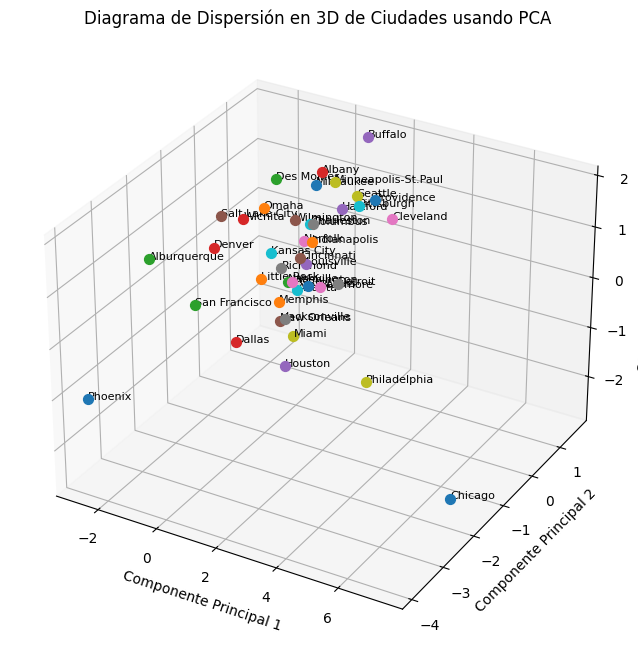

Componentes Principales:
           Componente 1  Componente 2  Componente 3
SO2            0.489699      0.084576     -0.014350
Neg.Temp      -0.315371     -0.088638     -0.677136
Empresas       0.541169     -0.225881     -0.267159
Poblacion      0.487588     -0.282004     -0.344838
Viento         0.249875      0.055471      0.311265
Precip         0.000187      0.625879     -0.492036
Dias           0.260179      0.677967      0.109579


In [6]:
indice_desc = eigenvalues.argsort()[::-1]
eigenvalues_ordenados_desc = eigenvalues[indice_desc]
eigenvectors_ordenados_desc = eigenvectors[:, indice_desc]

#selecionamos los tres eigenvectors con la menor varianza (los primeros tres después de ordenar)
componentes_principales = eigenvectors_ordenados_desc[:, :3]

# Cambiar el signo de la tercera componente de cada eigenvector seleccionado
#componentes_principales[:, -2:] = -componentes_principales[:, -2:]

#Proyectamos los datos originales sobre las tres primeras componentes principales
datos_comb_lineal = np.dot(datosUSA_df_escalados, componentes_principales)

#Creamos el gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


#Graficamos los datos proyectados en el espacio tridimensional y etiquetamos cada punto con el nombre de su ciudad
for i in range(len(datos_comb_lineal)):
    ax.scatter(datos_comb_lineal[i, 0], datos_comb_lineal[i, 1], datos_comb_lineal[i, 2], s=50)
    ax.text(datos_comb_lineal[i, 0], datos_comb_lineal[i, 1], datos_comb_lineal[i, 2], datosUSA['Ciudad'][i], fontsize=8)

#etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

#título
plt.title('Diagrama de Dispersión en 3D de Ciudades usando PCA')

plt.show()

print("Componentes Principales:")
print(pd.DataFrame(componentes_principales, columns=['Componente 1', 'Componente 2', 'Componente 3'], index=columnas))

Comenzamos ordenando los autovalores y autovectores obtenidos del análisis de PCA de manera descendente para asegurar que las componentes principales estén en el orden correcto de importancia. Luego, seleccionamos las tres primeras componentes principales que explican la mayor parte de la varianza de los datos. A continuación, proyectamos los datos originales estandarizados sobre estas tres primeras componentes principales para obtener las coordenadas en el nuevo espacio de menor dimensión.

El siguiente paso es crear el gráfico tridimensional utilizando la librería Matplotlib. Se itera sobre cada ciudad en el conjunto de datos proyectado y se grafica un punto tridimensional para cada una de ellas.

En cuanto a la interpretación de la gráfica, cada punto representa una ciudad en un espacio tridimensional definido por las tres primeras componentes principales. La posición relativa de las ciudades en este espacio se determina por su combinación lineal de características estandarizadas, donde las coordenadas de cada punto representan la contribución de cada ciudad a las tres primeras componentes principales.

Las componentes principales se muestran en forma de matriz al final del código, donde cada fila representa una variable original y cada columna representa una componente principal. Los valores en esta matriz indican la relación entre cada variable original y cada componente principal. Por ejemplo, valores más altos indican una mayor contribución de esa variable a la componente principal correspondiente. De esta manera, podemos interpretar que puede representar cada componente:

Componentes Principales:

1.   (Eje X) Está principalmente influenciada por variables como Empresas, Población, y SO2. Una ciudad con una alta puntuación en esta componente podría tener una mayor concentración de empresas y población, así como mayores niveles de SO2.(Lo cual es lógico, ya que a mayor población, van a existir más empresar y con ello más contaminación)

2.   (Eje Y) Está influenciada por Precipitaciones y días de lluvia. Por ello, esta componente nos está hablando de la cantidad de lluvias de la ciudad.

3.   (Eje Z) Está influenciada principalmente por el viento, pero observamos que también es inversamente proporcional a otras variables como la temperatura media o las precipitaciones. Obviamente, si una ciudad tiene más viento, las temperaturas serán menores y habrá menos lluvia (menos nubes).

Vamos a representar cada una de las proyeciones sobre los planos para poder ver de mejor manera alguna ciudad que pueda resultar interesante de estudiar:


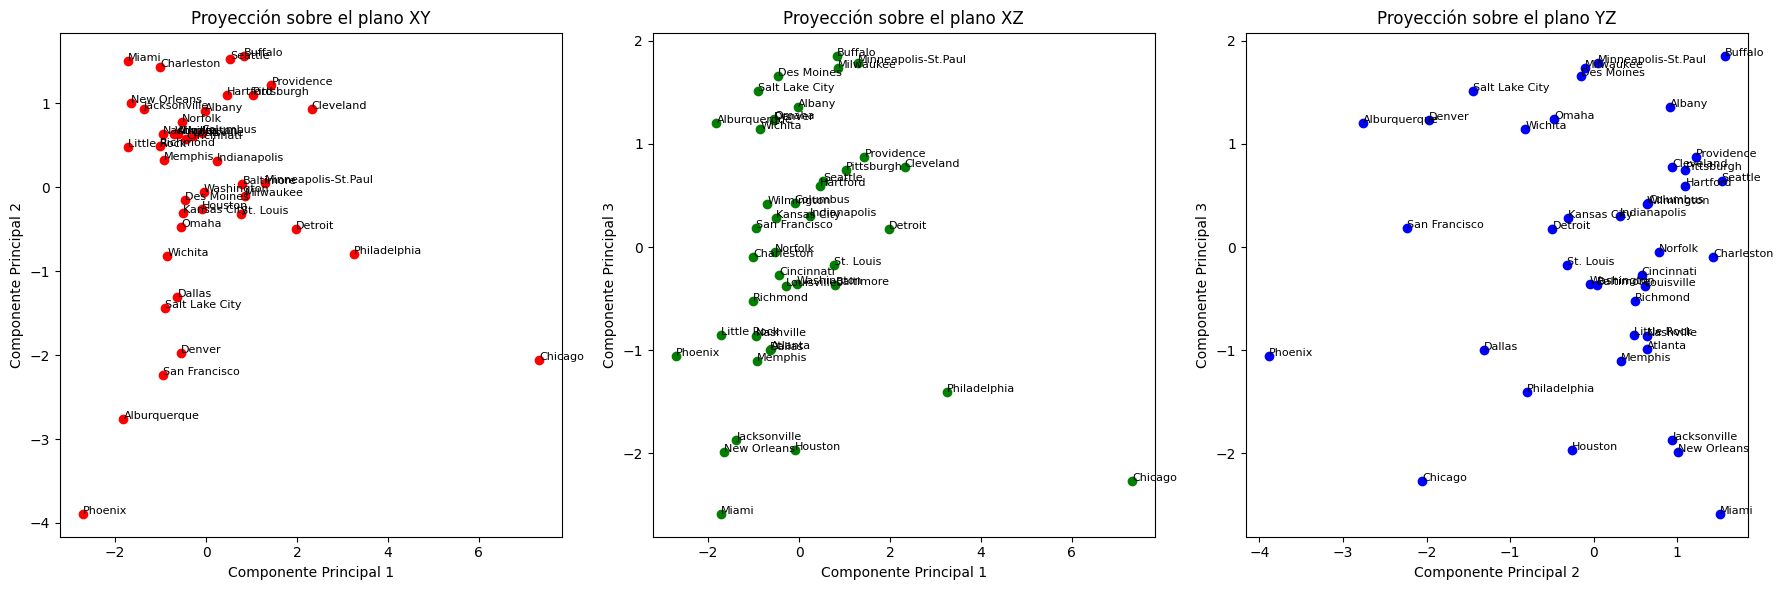

In [9]:
# Definir tres colores diferentes para cada plano de proyección
colores = ['r', 'g', 'b']

# Crear una figura con tres subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Proyección sobre el plano XY (Componentes 1 y 2)
axs[0].scatter(datos_comb_lineal[:, 0], datos_comb_lineal[:, 1], c=colores[0])
for i in range(len(datos_comb_lineal)):
    axs[0].text(datos_comb_lineal[i, 0], datos_comb_lineal[i, 1], datosUSA['Ciudad'][i], fontsize=8)
axs[0].set_xlabel('Componente Principal 1')
axs[0].set_ylabel('Componente Principal 2')
axs[0].set_title('Proyección sobre el plano XY')

# Proyección sobre el plano XZ (Componentes 1 y 3)
axs[1].scatter(datos_comb_lineal[:, 0], datos_comb_lineal[:, 2], c=colores[1])
for i in range(len(datos_comb_lineal)):
    axs[1].text(datos_comb_lineal[i, 0], datos_comb_lineal[i, 2], datosUSA['Ciudad'][i], fontsize=8)
axs[1].set_xlabel('Componente Principal 1')
axs[1].set_ylabel('Componente Principal 3')
axs[1].set_title('Proyección sobre el plano XZ')

# Proyección sobre el plano YZ (Componentes 2 y 3)
axs[2].scatter(datos_comb_lineal[:, 1], datos_comb_lineal[:, 2], c=colores[2])
for i in range(len(datos_comb_lineal)):
    axs[2].text(datos_comb_lineal[i, 1], datos_comb_lineal[i, 2], datosUSA['Ciudad'][i], fontsize=8)
axs[2].set_xlabel('Componente Principal 2')
axs[2].set_ylabel('Componente Principal 3')
axs[2].set_title('Proyección sobre el plano YZ')

plt.tight_layout()
plt.show()



Pasamos a comentar 4 ciudades concretas para analizar sus resultados:

In [ ]:
# Ciudades seleccionadas
ciudades_seleccionadas = ['San Francisco', 'Buffalo', 'Chicago', 'Phoenix']

# Obtener los índices de las ciudades seleccionadas en el DataFrame original
indices_ciudades = [datosUSA.index[datosUSA['Ciudad'] == ciudad].tolist()[0] for ciudad in ciudades_seleccionadas]

# Extraer los datos proyectados de las ciudades seleccionadas
datos_proyectados_ciudades = datos_comb_lineal[indices_ciudades]

# Crear un DataFrame para mostrar los resultados
df_resultados = pd.DataFrame(datos_proyectados_ciudades, columns=['Componente 1', 'Componente 2', 'Componente 3'], index=ciudades_seleccionadas)

# Imprimir los resultados
print("Datos proyectados en las componentes principales para las ciudades seleccionadas:")
print(df_resultados)


Datos proyectados en las componentes principales para las ciudades seleccionadas:
               Componente 1  Componente 2  Componente 3
San Francisco     -0.938965     -2.237246      0.183748
Buffalo            0.827309      1.568931      1.853903
Chicago            7.320800     -2.052442     -2.263394
Phoenix           -2.715976     -3.891439     -1.058355


Como hemos visto de manera gráfica y teniendo en cuenta lo comentado anteriormente respecto a cada compoente podemos concluir lo siguiente:

San Francisco: Se proyecta en una posición negativa en la componente principal 2. Esto indica una muy baja relación con las precipitaciones y los días de lluvia, lo que concuerda con el clima más seco característico de la costa oeste de los Estados Unidos.

Buffalo: La proyección en la componente principal 1 y 2 es positiva, lo que sugiere una influencia de empresas y población, así como de precipitaciones. En la componente principal 3, la posición también es positiva y muy elevada, indicando una alta relación con la cantidad de viento.

Chicago: Se proyecta en una posición muy positiva en la componente principal 1, lo que sugiere una gran influencia de empresas y población. La posición en la componente principal 2 es negativa, lo que indica una baja relación con las precipitaciones y los días de lluvia. La posición en la componente principal 3 también es negativa, lo que sugiere una baja influencia del viento. Estos resultados son coherentes con Chicago como una ciudad grande y desarrollada, con una población y actividad empresarial significativas, y con un clima continental con estaciones definidas y no tan influenciado por el viento.

Phoenix: La proyección en la componente principal 1 y 2 es muy negativa, sugiriendo una baja influencia de empresas y población, niveles más bajos de SO2 y pocas lluvias. Esto coincide con el clima árido y semiárido de Phoenix y su baja densidad de población en comparación con otras grandes ciudades.

**4.- (1 punto) Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara
los resultados y coméntalos**

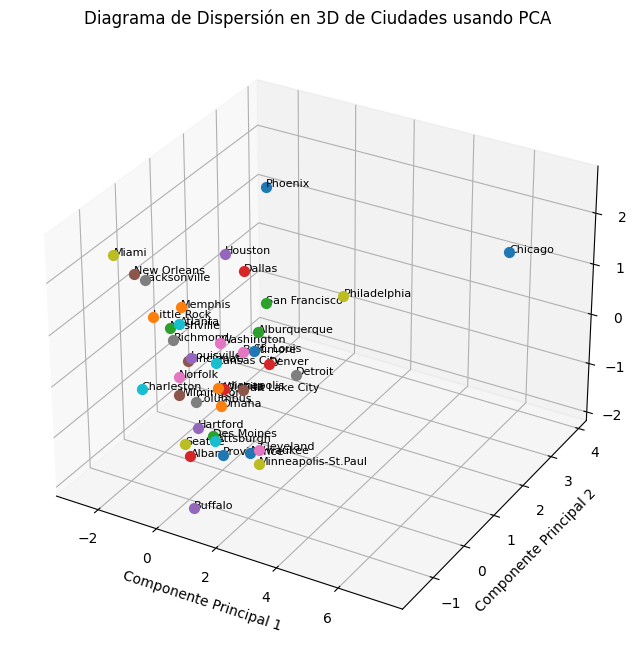


Información perdida con 2 componentes: 0.39422078021988627
Información representada con 3 componentes: 0.8050610753626253
Contribución de cada variable a las tres primeras componentes principales:
           Componente 1  Componente 2  Componente 3
SO2            0.489699     -0.084576      0.014350
Neg.Temp      -0.315371      0.088638      0.677136
Empresas       0.541169      0.225881      0.267159
Poblacion      0.487588      0.282004      0.344838
Viento         0.249875     -0.055471     -0.311265
Precip         0.000187     -0.625879      0.492036
Dias           0.260179     -0.677967     -0.109579


In [ ]:
#La estandarización de los datos se haria igual, con la funcion StandardScaler

# Calculamos PCA con scikit-learn
pca = PCA(n_components=3)
pca.fit(datosUSA_df_escalados)
datos_proyectados = pca.transform(datosUSA_df_escalados)

# Gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los datos proyectados en el espacio tridimensional y etiquetamos cada punto con el nombre de su ciudad
for i in range(len(datos_proyectados)):
    ax.scatter(datos_proyectados[i, 0], datos_proyectados[i, 1], datos_proyectados[i, 2], s=50)
    ax.text(datos_proyectados[i, 0], datos_proyectados[i, 1], datos_proyectados[i, 2], datosUSA['Ciudad'][i], fontsize=8)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Diagrama de Dispersión en 3D de Ciudades usando PCA')

# Mostramos el gráfico
plt.show()

# Porcentaje de varianza explicada por cada componente
porcentaje_varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = porcentaje_varianza_explicada.cumsum()

# Imprimir información sobre la varianza explicada y acumulada
print("\nInformación perdida con 2 componentes:", 1 - varianza_acumulada[1])
print("Información representada con 3 componentes:", varianza_acumulada[2])

# DataFrame de las componentes principales
df_componentes_principales = pd.DataFrame(
    pca.components_.T,  # Transponer para que las variables sean filas y las componentes sean columnas
    columns=[f'Componente {i+1}' for i in range(pca.n_components_)],
    index=columnas
)

# Imprimir la contribución de cada variable a las tres primeras componentes principales
print("Contribución de cada variable a las tres primeras componentes principales:")
print(df_componentes_principales)

Usando la biblioteca scikit-learn, realizamos el Análisis de Componentes Principales (PCA) en el conjunto de datos de ciudades de Estados Unidos. En primer lugar, estandarizamos los datos (igual que en el apartado 1). Luego, aplicamos PCA con tres componentes principales. Utilizamos la función transform para proyectar los datos originales sobre las tres primeras componentes principales.

El gráfico tridimensional resultante muestra la distribución de las ciudades en el espacio definido por estas componentes. Calculamos el porcentaje de varianza explicada por cada componente y su varianza acumulada para evaluar la cantidad de información conservada en el nuevo espacio dimensional. Observamos que la información perdida con dos componentes y tres componentes es la misma que la calculada en el apartado 2.

Al comparar los resultados de las componentes principales obtenidas con scikit-learn con los obtenidos anteriormente, notamos que los patrones son similares, aunque las direcciones de las componentes pueden diferir debido a como funciona de manera interna la propia función pca.

Es importante mencionar que, aunque los ejes Y y Z pueden estar invertidos en la gráfica tridimensional generada por scikit-learn en comparación con nuestra implementación anterior, la distribución general de las ciudades sigue siendo la misma. Esto se debe a que la orientación de los ejes en el espacio tridimensional es arbitraria y no afecta la interpretación de los resultados del PCA.

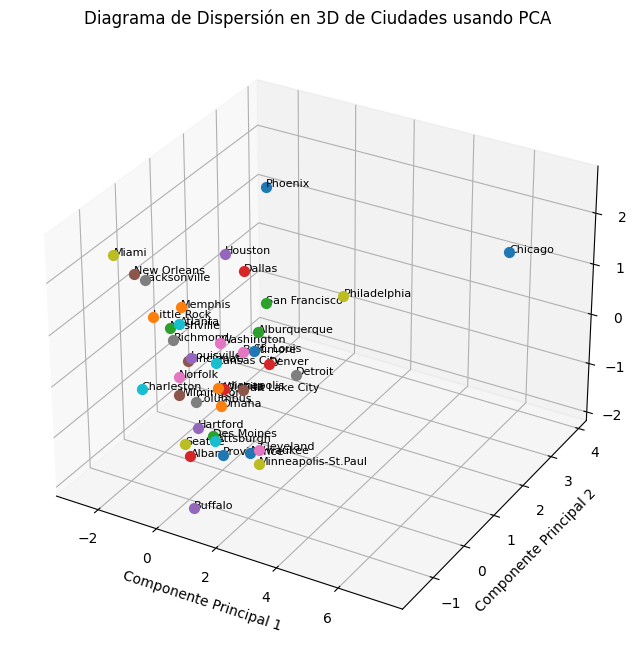

Componentes Principales:
           Componente 1  Componente 2  Componente 3
SO2            0.489699     -0.084576      0.014350
Neg.Temp      -0.315371      0.088638      0.677136
Empresas       0.541169      0.225881      0.267159
Poblacion      0.487588      0.282004      0.344838
Viento         0.249875     -0.055471     -0.311265
Precip         0.000187     -0.625879      0.492036
Dias           0.260179     -0.677967     -0.109579


In [ ]:
# Cambiar el signo de la tercera componente de cada eigenvector seleccionado
componentes_principales[:, -2:] = -componentes_principales[:, -2:]

#Proyectamos los datos originales sobre las tres primeras componentes principales
datos_comb_lineal = np.dot(datosUSA_df_escalados, componentes_principales)

#Creamos el gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


#Graficamos los datos proyectados en el espacio tridimensional y etiquetamos cada punto con el nombre de su ciudad
for i in range(len(datos_comb_lineal)):
    ax.scatter(datos_comb_lineal[i, 0], datos_comb_lineal[i, 1], datos_comb_lineal[i, 2], s=50)
    ax.text(datos_comb_lineal[i, 0], datos_comb_lineal[i, 1], datos_comb_lineal[i, 2], datosUSA['Ciudad'][i], fontsize=8)

#etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

#título
plt.title('Diagrama de Dispersión en 3D de Ciudades usando PCA')

plt.show()

print("Componentes Principales:")
print(pd.DataFrame(componentes_principales, columns=['Componente 1', 'Componente 2', 'Componente 3'], index=columnas))

Observamos que si volvemos a dibujar nuestra implementacion de PCA, pero cambiando el signo de la segunda y tercera componente, y ahora si coinciden al 100% los resultados. Esto no es un problema, ya que la información que aporta es la misma. Por ejemplo, con nuestra implementación la segunda componente nos daba información sobre ciudades donde hay muchas precipitaciones y dias de lluvias, pero si invertimos los signos estaría dando información de ciudades donde hay pocas lluvias. El resultado final, de manera práctica, es el mismo.